# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

You will have up to **two hours** to complete this assessment.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [20]:
# import the necessary libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Find and assign to the variables in the next cell:

1. $P(A and B)$

2. $P(A or B)$

3. $P(A|B)$

4. $P(B|A^{c})$

Hint: draw a diagram!


In [116]:
ans1 = 0.7*0.4
ans2 = 0.7+0.5-(ans1)
ans3 = (ans1)/0.5
ans4 = 0.7333
print(ans1)
print(ans2)
print(ans3)
print(ans4)

0.27999999999999997
0.9199999999999999
0.5599999999999999
0.7333


### b. Card Combinatorics

You have a standard deck of 52 cards. We define three subsets:

1. What is the probability of drawing a king or a queen?
2. How many possible 5-card combinations can be formed with this deck of 52 cards?
3. Given that you've drawn 5 cards without replacement, what is the probability of getting **2 red cards** and **3 black cards**?


In [143]:
from scipy.special import comb
ans1 = 8/52
ans2 = comb(52,5)
ans3a = (2/47)*(3/47) #???
ans3b=(comb(47,2)+comb(47,3))/comb(52,5) #???
print(ans1)
print(ans2)
print(ans3b)

0.15384615384615385
2598960.0
0.006654969680179764
0.0027161611588954276


### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

1. Let $k$ be the number of points won in the game. Write a function that takes in the number of draws, the probability of winning a point and $k$ to return the corresponding probability.

In [117]:
def probability_of_scoring_k(n, p, k):
#     n = number of draws
#     p = probability of winning a point
#     k = number of points scored
#     Use np.factorial()
    const=comb(n,k)
    prob=(p**k)*((1-p)**(n-k))*const
    return prob

2. Using your function, what is the probability of winning 8 points out of 22 draws?


In [118]:
ans2 = probability_of_scoring_k(22,(12/52),8)
ans2
                                

0.06532117736042573

3. Plot the probability mass function of $k$ in 22 draws.


Text(0.5, 0, 'draws')

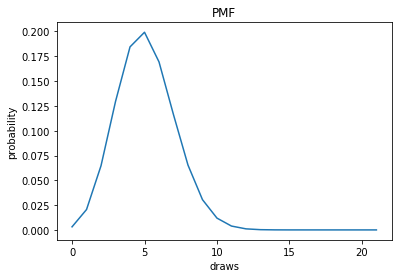

In [121]:
pmf=[]
cdf=[]
for i in range(22):
    pmf.append(probability_of_scoring_k(22,(12/52),i))
plt.plot(pmf)
plt.title('PMF')
plt.ylabel('probability')
plt.xlabel('draws')

4. Plot the cumulative density function of $k$ in 22 draws.

Text(0, 0.5, 'Cumulative Probabilities')

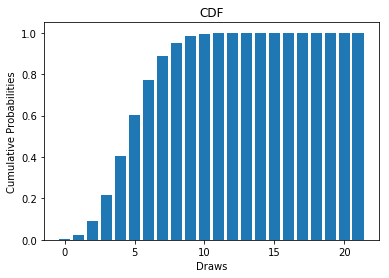

In [120]:
def cdf(p):
    current=0
    cdf=[]
    for prob in p:
        current+=prob
        cdf.append(current)
    return cdf
cdf=cdf(pmf)
xvals=list(range(22))
yvals=cdf
xvals
plt.bar(xvals,yvals)
plt.title("CDF")
plt.xlabel('Draws')
plt.ylabel('Cumulative Probabilities')

## Part 2: Statistical Distributions

### a. Descriptive Statistics

1. `ratings` is a list of ratings for a TexMex restaurant. Compute the descriptive statistics of `ratings`.

In [124]:
ratings = [1, 2, 7, 7.5, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10]

mean = np.mean(ratings)
median = np.median(ratings)
mode = stats.mode(ratings)
standard_deviation = np.std(ratings)
number_range = (np.min(ratings),np.max(ratings))
interquartile_range = stats.iqr(ratings)

print(
"Mean: ", mean, "\n" 
"Median: ", median, "\n"
"Mode: ", mode, "\n"
"Standard Deviation: ", standard_deviation, "\n"
"Range: ", number_range, "\n"
"Interquartile Range: ", interquartile_range)

Mean:  7.694444444444445 
Median:  8.0 
Mode:  ModeResult(mode=array([8.]), count=array([8])) 
Standard Deviation:  2.351942984527715 
Range:  (1.0, 10.0) 
Interquartile Range:  1.0


2. What measure of centrality would you use to most fairly describe the ratings and why?

In [ ]:
# the median because the mean is too skewed to the left 

### b. Continuous Distributions

Say we have data on all $10,000$ checks for this TexMex restaurant and they happen to be normally distributed with $\mu = 20$ and $\sigma = 2$. We can visualize the data as follows: 

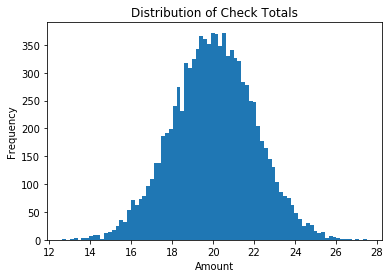

In [60]:
data = pickle.load(open("data/data10000.pkl", "rb"))
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data, bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

1. Write a function to compute z-scores of single checks.


In [61]:
def z_score(check_amt):
#     check_amt = the amount for which we want to compute the z-score
    mu=np.mean(data)
    std=np.std(data)
    z=(check_amt-mu)/std
    return z

2. Using $\alpha = 0.05$, is my 23 dollar check significantly **greater** than the mean? Assign boolean `True` for yes, `False` for no to `ans2`.
3. What if my check comes up to 24 dollars?

In [65]:
z_score(23) #1.4863
#Pr(z<=1.4863)=0.93189
ans2 = False

z_score(24) #1.986
#Pr(z<=1.4863)=0.9767
ans3 = True

4. Define **confidence interval** and determine the 95% confidence interval for this population.

In [75]:
mu=np.mean(data)
std=np.std(data)
CI=((mu-(1.96*std)),(mu+(1.96*std)))
CI

(16.109215302932718, 23.947117075103996)

In [ ]:
# The confidence interval is the values in which we expect to see the
#values between some percentage of the time (ex: 90% CI- we expect to see
#the values within the calculated range 90% of the time)

5. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
# The central limit theorem estimates mu and std according to the normal
# distribution, with mu=0 and std(and var)=1. The theorem states that
# the sum of these i.i.d samples is approximately normally distributed

## Part 3: Statistical Testing

### a. Hypotheses and Errors

This TexMex restaurant recently introduced Queso to its menu. The restaurant owners want to know if customers ordering Queso end up spending **more or less**. Let the average amount on Queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ `hypothesis here`

$H_{A}:$ `hypothesis here`

2. In this context, what does it mean to make `Type I` and `Type II` errors?

In [ ]:
# H0: E[X]=E[Xq]
#H1: E[Xq]<E[X]<E[Xq]
#Type I Erorr: concluding the that average amount spent has changed when
#it did not actually change
#Type II error: concluding that the average amount spent is equal when it
#is not truly equal

### b. Sample Testing

Now assume we don't have reliable data on the population. With $\alpha = 0.05$, we want to determine if Queso checks are significantly more **or** less than normal. We have random samples of Queso and Non-Queso checks. The samples are in the graphs below and you may assume they have equal variances.

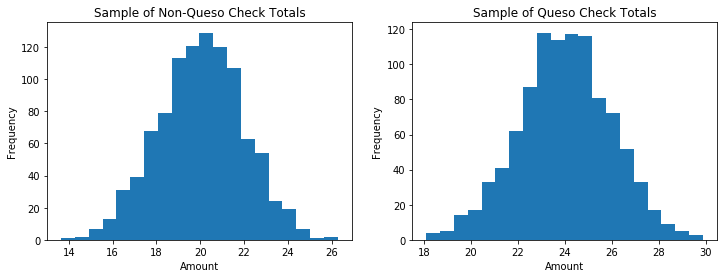

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()
len(no_queso)+len(queso)
nq=len(no_queso)
q=len(queso)

1. Run a `statistical test` on the two samples to determine whether you should reject your null hypothesis.

In [129]:
mu=np.mean(no_queso)
muq=np.mean(queso)
stdq=np.std(queso)
std=np.std(no_queso)
num=muq-mu
denom=(stdq/np.sqrt(q))
tstat=num/denom
t_stat=stats.t.ppf(0.95,1998)
if tstat<t_stat:
    print("since the tvalue {} is less than {}, we cannoy reject H0, means the same".format(tstat,t_stat))
elif tstat>t_stat:
    print("since the tvalue {} is more than {}, we can reject H0, means ARE NOT the same".format(tstat,t_stat))
    
#?????????????!!
    
    
    
    

since the tvalue 63.13591818588531 is more than 1.6456166300576656, we can reject H0, means ARE NOT the same


In [133]:
s=0
for nqi in no_queso:
    s+=(nqi-mu)**2
snq=s/(nq-1)
s=0
for qi in queso:
    s+=(qi-muq)**2
sq=s/(q-1)
sp=((nq-1)*snq+(q-1)*sq)/(q+nq-2)
tval=(mu-muq)/np.sqrt(sp*((1/q)+(1/nq)))
t_stat=stats.t.ppf(0.95,1998)
if tval<t_stat:
    print("since the tvalue {} is less than {}, we cannot reject H0, means the same".format(tstat,t_stat))
elif tval>t_stat:
    print("since the tvalue {} is more than {}, we can reject H0, means ARE NOT the same".format(tstat,t_stat))
    

since the tvalue 63.13591818588531 is less than 1.6456166300576656, we cannoy reject H0, means the same


In [134]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

tstat = twosample_tstatistic(queso, no_queso)
tstat

45.16857748646329

2. What are the conditions required to perform the test you chose?

In [ ]:
# Your written answer here !!!?!??!?!

## Part 4: Bayesian Statistics
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

1. What is the probability of Thomas getting a small puppy?
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store?
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4. For Part 2, what is the prior, posterior and likelihood?

In [1]:
ans1 = (0.2*0.6)+(0.1*0.8)
ans2 = 0.1/(0.1+0.55)
ans3 = "pet store"
ans4_prior = "he got a small puppy"
ans4_posterior = "he went to pet store or pound"
ans4_likelihood = "likelihood he went to pet store is 85.71%"

In [3]:
print(ans1)
print(ans2)
print(ans3)
print(ans4_prior)
print(ans4_posterior)
print(ans4_likelihood)

0.2
0.15384615384615385
pet store
he got a small puppy
he went to pet store or pound
likelihood he went to pet store is 85.71%
